In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, './')
import iaaft

# Visualize Distribution of Correlations

In [2]:
data = np.load('../data/data_centered.npy', allow_pickle=True)
print(f"first time series centered mean:{np.round(data[:,0,0].mean(), 10)}")
print(f"first time series centered std:{np.round(data[:,0,0].std(), 10)}")

first time series centered mean:0.0
first time series centered std:1.0


## Check influence of autocorrelation 

In [3]:
corr = []
autocorr = []
for k in range(100000):
    lons = np.random.randint(data.shape[1], size=2)
    lats = np.random.randint(data.shape[2], size=2)
    
    t1 = data[:, lons[0], lats[0]]
    t2 = data[:, lons[1], lats[1]]
    corr.append(np.corrcoef(t1, t2)[0,1])
    t2_surr = iaaft.surrogates(t2, 1, verbose=False)[0]
    autocorr.append(np.corrcoef(t1, t2_surr)[0,1])
corr = np.array(corr)
autocorr = np.array(autocorr)
corr_shift = np.mean(np.abs(corr - autocorr))
print(f'mean correlation caused by autocorrelation: {corr_shift}')

mean correlation caused by autocorrelation: 0.2753107252863774


In [12]:
alpha = 0.001
samples = 100000
T = 168
#T = data.shape[0]//12
t1 = np.random.normal(0,1,(samples, T))
t2 = np.random.normal(0,1,(samples, T))
test_statistics = []
for i in range(samples): 
    corr = np.corrcoef(t1[i], t2[i])[0,1]
    test_statistics.append(corr)

KeyboardInterrupt: 

Quantiles/Rejection regions are [2.2110686094589514e-05, -0.25066268602350006), (0.2523560460142351,1]


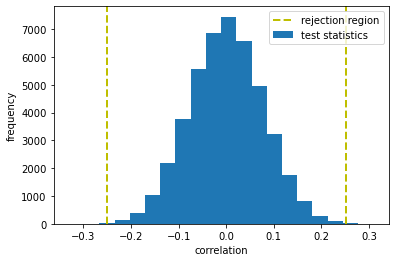

In [13]:
upper_quantile = np.quantile(test_statistics, q=1-alpha/2)
lower_quantile = np.quantile(test_statistics, q=alpha/2)
print("Quantiles/Rejection regions are [{}, {}), ({},1]".format(1/len(test_statistics), lower_quantile, upper_quantile))
plt.hist(test_statistics, label="test statistics", bins=20)
plt.axvline(upper_quantile, color='y', linestyle='dashed', linewidth=2, label="rejection region")
plt.axvline(lower_quantile, color='y', linestyle='dashed', linewidth=2)
plt.ylabel("frequency")
plt.xlabel("correlation")
plt.legend()

plt.savefig('../plots/hypothesis_testing.svg', format="svg")
plt.savefig('../plots/hypothesis_testing.jpg')

plt.show()